### Individual Homework

#### Enter your name here: Sabrina Mendes Braga

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [14]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [15]:

genre_counts = movies['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Movie Count']

print(genre_counts)


          Genre  Movie Count
0        Comedy          848
1        Action          738
2         Drama          498
3     Adventure          288
4         Crime          202
5     Biography          135
6        Horror          131
7     Animation           35
8       Fantasy           28
9   Documentary           25
10      Mystery           16
11       Sci-Fi            7
12       Family            3
13      Musical            2
14      Romance            2
15      Western            2
16     Thriller            1


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [16]:
genre_stats = movies.groupby('genre').agg({
    'gross': 'mean',
    'budget': 'mean'
}).reset_index()

genre_stats['return_on_budget'] = genre_stats['gross'] / genre_stats['budget']
genre_stats = genre_stats.sort_values(by='return_on_budget', ascending=False)
genre_stats.columns = ['Genre', 'Avg Gross', 'Avg Budget', 'Return on Budget']
print(genre_stats)


          Genre     Avg Gross    Avg Budget  Return on Budget
11      Musical  9.208400e+07  3.189500e+06         28.870983
8        Family  1.491605e+08  1.483333e+07         10.055763
16      Western  2.082188e+07  3.465000e+06          6.009202
6   Documentary  1.735397e+07  5.887852e+06          2.947420
10       Horror  3.771374e+07  1.350492e+07          2.792593
9       Fantasy  4.240884e+07  1.758214e+07          2.412040
4        Comedy  4.263055e+07  2.444632e+07          1.743843
12      Mystery  6.753302e+07  3.921875e+07          1.721958
2     Animation  9.843379e+07  6.170143e+07          1.595324
3     Biography  4.520181e+07  2.854370e+07          1.583600
1     Adventure  9.579426e+07  6.629007e+07          1.445077
7         Drama  3.746537e+07  2.624293e+07          1.427637
5         Crime  3.750240e+07  2.659617e+07          1.410068
13      Romance  3.126485e+07  2.510750e+07          1.245239
0        Action  8.658386e+07  7.135489e+07          1.213426
14      

**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [17]:
genre_stats = movies.groupby('genre').agg({
    'gross': 'mean',
    'budget': 'mean'
}).reset_index()

genre_stats['return_on_budget'] = genre_stats['gross'] / genre_stats['budget']
genre_stats = genre_stats.sort_values(by='return_on_budget', ascending=False)
genre_stats.columns = ['Genre', 'Avg Gross', 'Avg Budget', 'Return on Budget']
print(genre_stats)


          Genre     Avg Gross    Avg Budget  Return on Budget
11      Musical  9.208400e+07  3.189500e+06         28.870983
8        Family  1.491605e+08  1.483333e+07         10.055763
16      Western  2.082188e+07  3.465000e+06          6.009202
6   Documentary  1.735397e+07  5.887852e+06          2.947420
10       Horror  3.771374e+07  1.350492e+07          2.792593
9       Fantasy  4.240884e+07  1.758214e+07          2.412040
4        Comedy  4.263055e+07  2.444632e+07          1.743843
12      Mystery  6.753302e+07  3.921875e+07          1.721958
2     Animation  9.843379e+07  6.170143e+07          1.595324
3     Biography  4.520181e+07  2.854370e+07          1.583600
1     Adventure  9.579426e+07  6.629007e+07          1.445077
7         Drama  3.746537e+07  2.624293e+07          1.427637
5         Crime  3.750240e+07  2.659617e+07          1.410068
13      Romance  3.126485e+07  2.510750e+07          1.245239
0        Action  8.658386e+07  7.135489e+07          1.213426
14      

**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

          genre      mean  min  max  median       std
0        Action  6.232249  2.1  9.0    6.30  1.030362
1     Adventure  6.506597  2.3  8.6    6.60  1.093881
2     Animation  6.651429  4.5  8.0    6.90  0.968131
3     Biography  7.114074  4.5  8.9    7.20  0.759827
4        Comedy  6.109670  1.9  8.8    6.20  1.023075
5         Crime  6.915347  4.8  9.3    6.90  0.849356
6   Documentary  6.660000  1.6  8.5    7.40  1.766588
7         Drama  6.731526  2.1  8.8    6.80  0.916993
8        Family  6.500000  5.7  7.9    5.90  1.216553
9       Fantasy  6.153571  4.3  7.9    6.45  0.958966
10       Horror  5.833588  3.6  8.5    5.90  1.014329
11      Musical  6.750000  6.3  7.2    6.75  0.636396
12      Mystery  6.856250  4.6  8.5    6.90  0.881641
13      Romance  6.650000  6.2  7.1    6.65  0.636396
14       Sci-Fi  6.657143  5.0  8.2    6.40  1.093705
15     Thriller  4.800000  4.8  4.8    4.80       NaN
16      Western  5.700000  4.1  7.3    5.70  2.262742


/tmp/ipykernel_5945/595299208.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Genre")


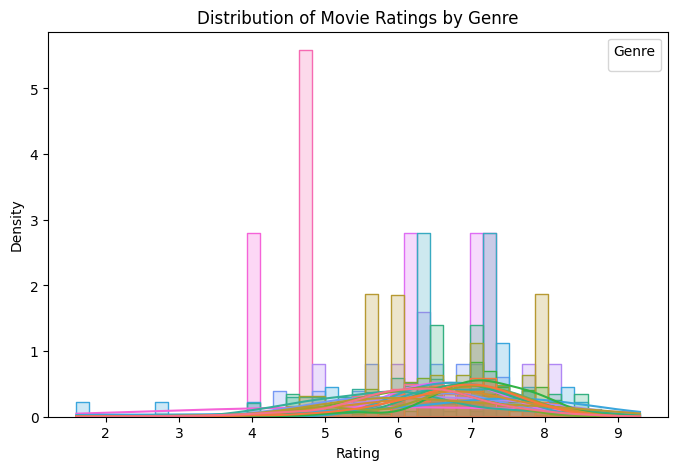

In [18]:
rating_stats = movies.groupby('genre')['rating'].agg(
    mean='mean',
    min='min',
    max='max',
    median='median',
    std='std'
).reset_index()

print(rating_stats)

plt.figure(figsize=(8,5))
sns.histplot(data=movies, x='rating', hue='genre', kde=True, element='step', stat='density', common_norm=False)
plt.title("Distribution of Movie Ratings by Genre")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend(title="Genre")
plt.show()


**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

          genre          votes     reviews    rating
12      Mystery  233289.250000  943.437500  6.856250
14       Sci-Fi  168126.000000  778.857143  6.657143
0        Action  153262.800813  670.014905  6.232249
5         Crime  148561.574257  554.178218  6.915347
1     Adventure  137557.406250  531.079861  6.506597
3     Biography  116361.962963  475.888889  7.114074
8        Family  101881.333333  337.666667  6.500000
13      Romance  100614.500000  425.000000  6.650000
2     Animation   97394.628571  382.942857  6.651429
7         Drama   91420.405622  495.983936  6.731526
11      Musical   87286.500000  290.500000  6.750000
9       Fantasy   83578.428571  557.500000  6.153571
10       Horror   75997.267176  658.099237  5.833588
4        Comedy   68268.516509  325.123821  6.109670
16      Western   19797.000000   94.000000  5.700000
6   Documentary   18488.160000  222.120000  6.660000
15     Thriller     241.000000   15.000000  4.800000


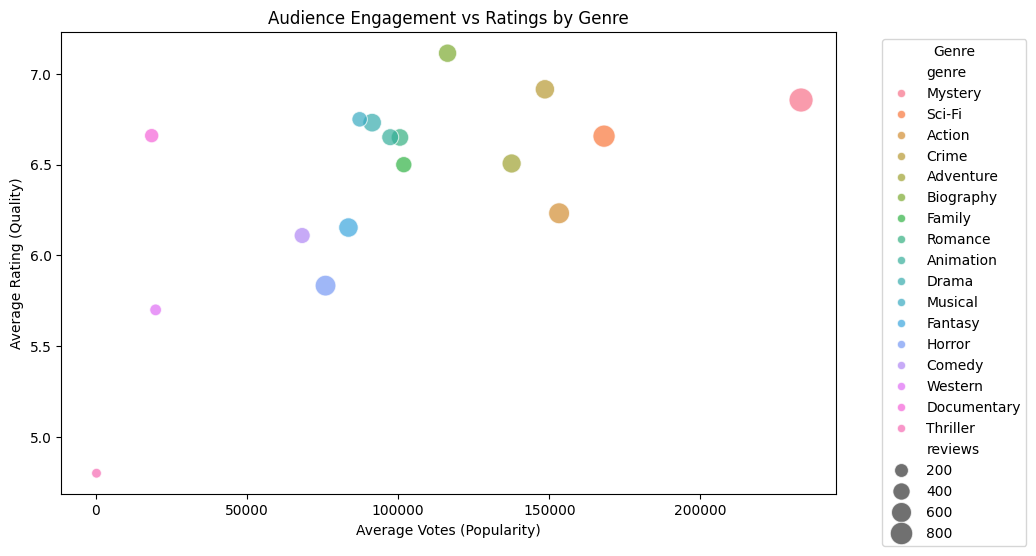

In [ ]:
engagement_stats = movies.groupby('genre').agg({
    'votes': 'mean',
    'reviews': 'mean',
    'rating': 'mean'
}).reset_index()

engagement_stats = engagement_stats.sort_values(by='votes', ascending=False)
print(engagement_stats)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=engagement_stats, 
    x='votes', 
    y='rating', 
    size='reviews', 
    hue='genre', 
    sizes=(50, 300), 
    alpha=0.7
)
plt.title("Audience Engagement vs Ratings by Genre")
plt.xlabel("Average Votes (Popularity)")
plt.ylabel("Average Rating (Quality)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Genre")
plt.show()


#Explanation: Genres like Action and Adventure receive the highest audience engagement, with far more votes and reviews, 
# indicating strong popularity. In contrast, genres such as Documentary and Drama achieve higher average ratings, 
# suggesting that critical quality does not always align with mass audience appeal.


#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

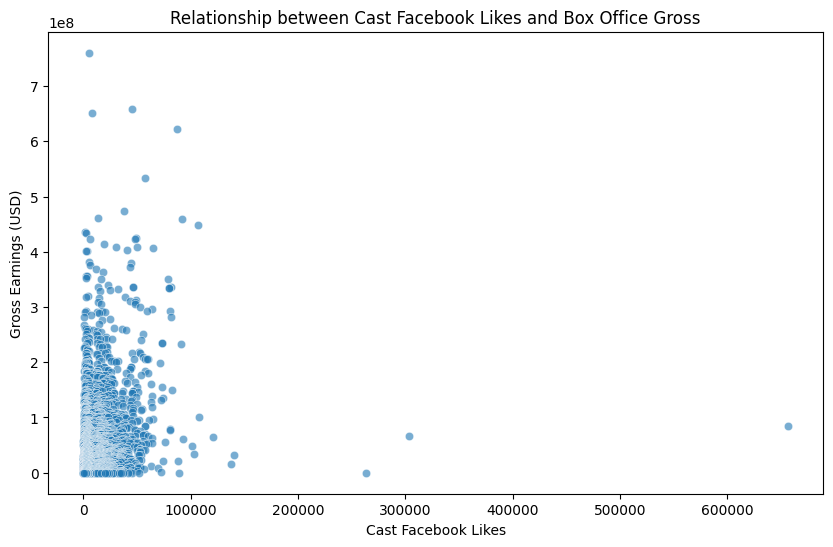

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=movies, 
    x='cast_facebook_likes', 
    y='gross', 
    alpha=0.6
)
plt.title("Relationship between Cast Facebook Likes and Box Office Gross")
plt.xlabel("Cast Facebook Likes")
plt.ylabel("Gross Earnings (USD)")
plt.show()


**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

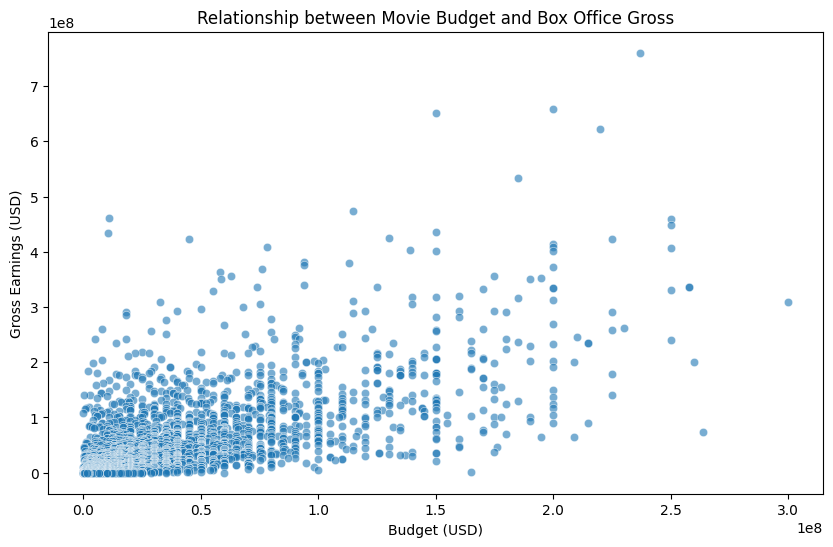

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=movies, 
    x='budget', 
    y='gross', 
    alpha=0.6
)
plt.title("Relationship between Movie Budget and Box Office Gross")
plt.xlabel("Budget (USD)")
plt.ylabel("Gross Earnings (USD)")
plt.show()

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

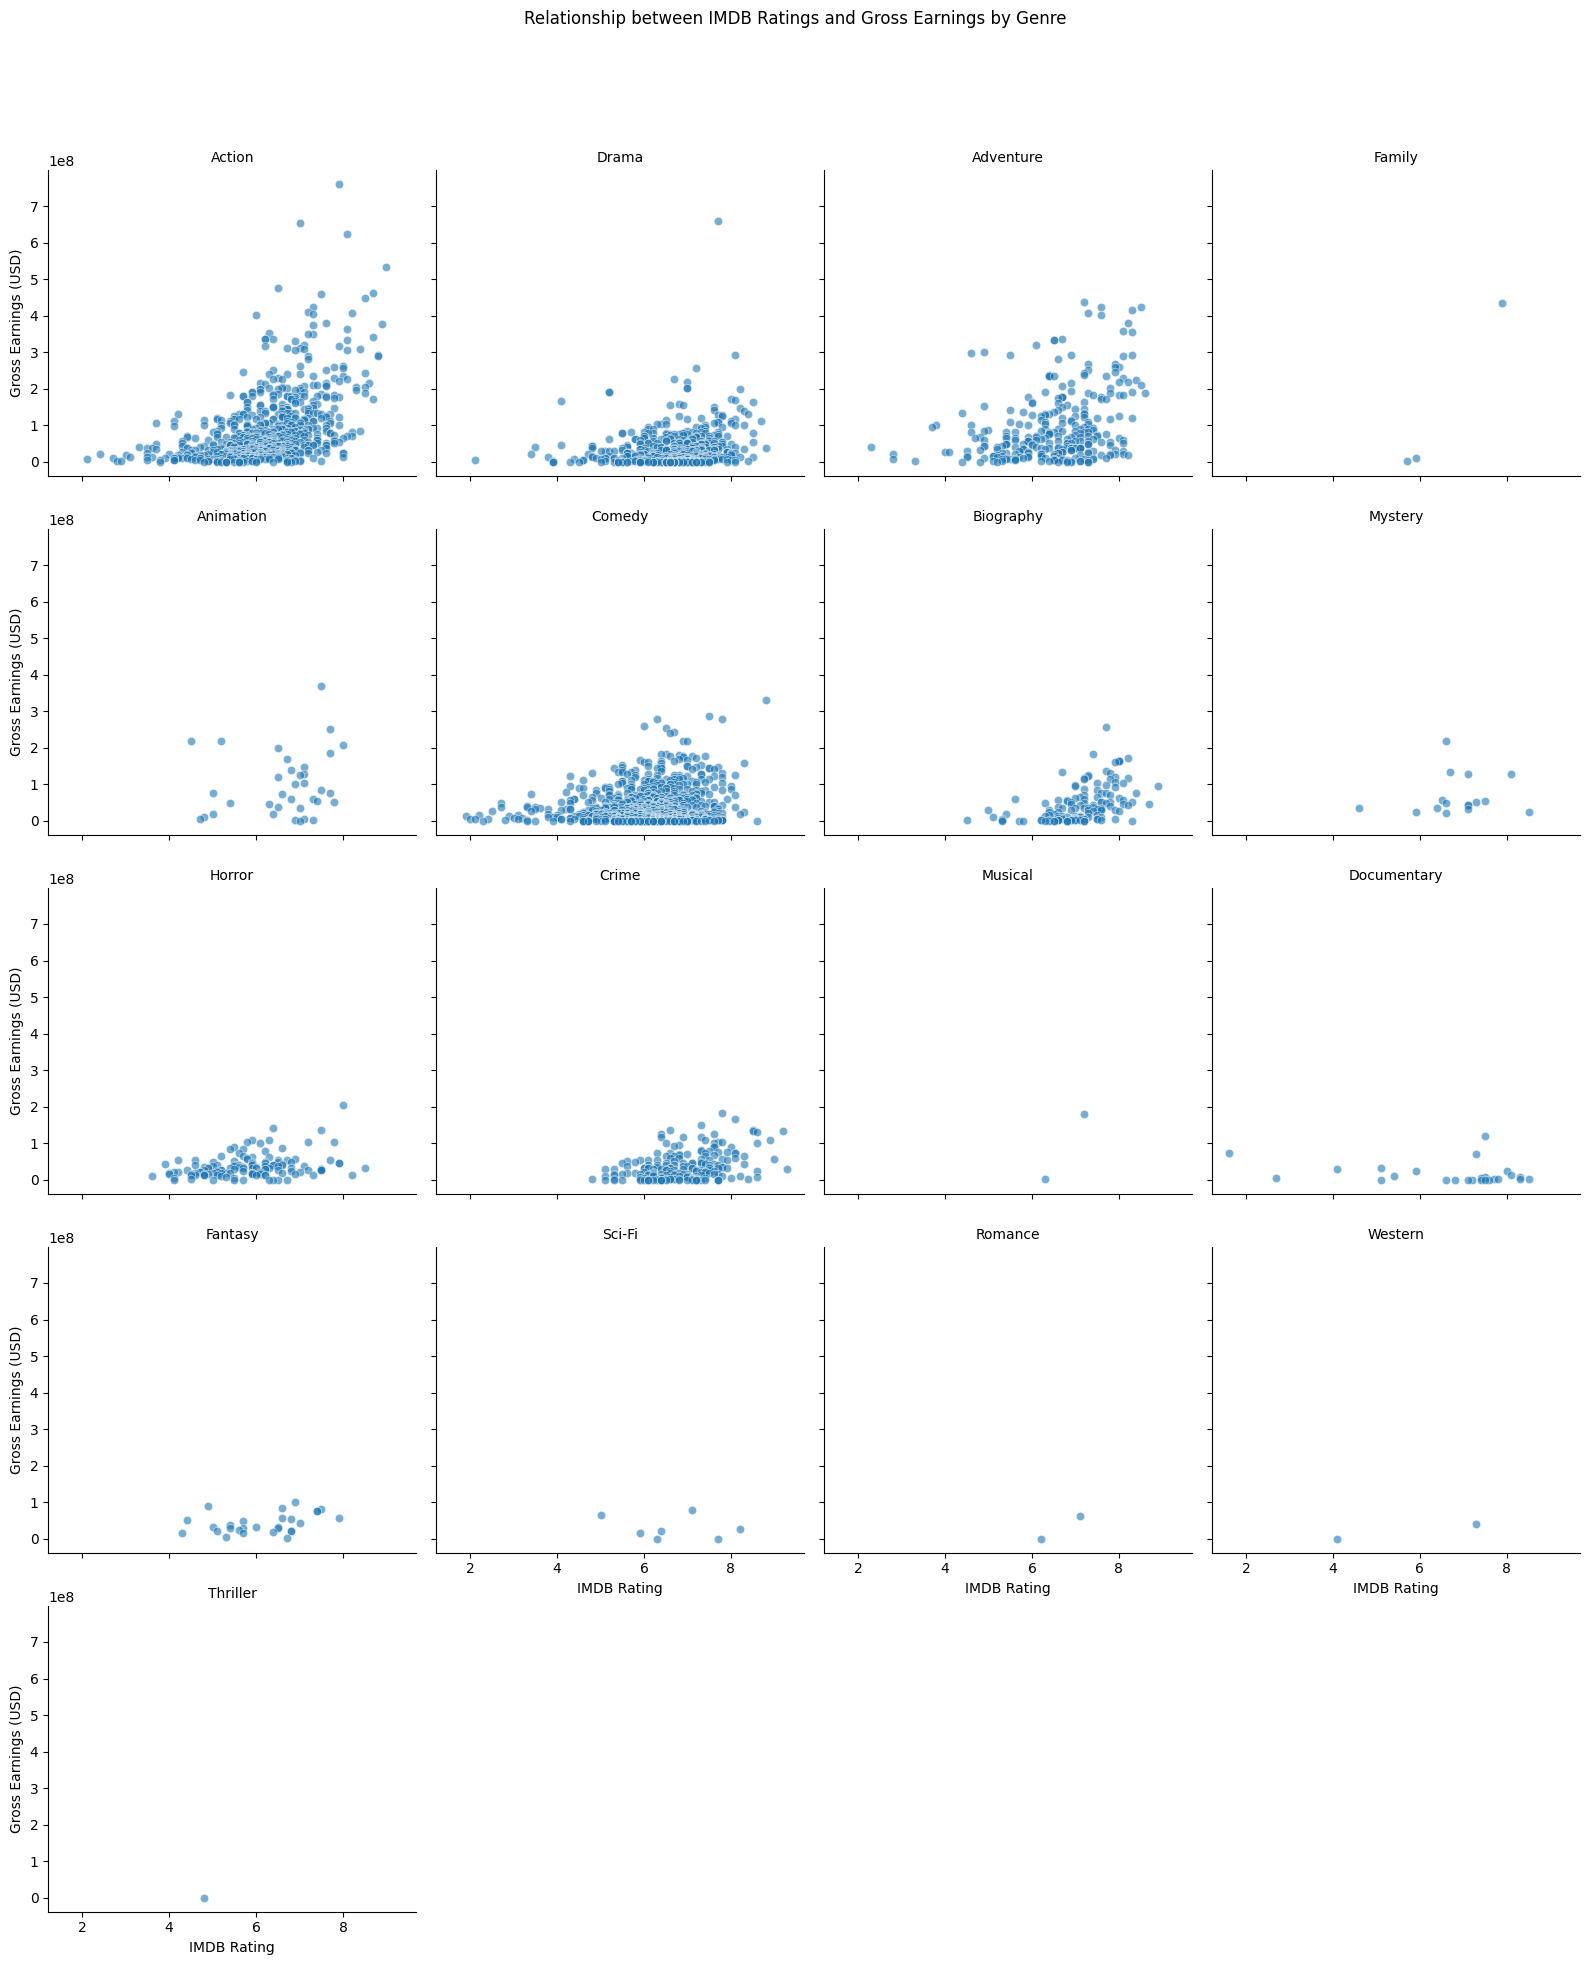

In [22]:
g = sns.relplot(
    data=movies,
    x="rating",
    y="gross",
    col="genre",
    col_wrap=4,
    kind="scatter",
    height=4,
    alpha=0.6
)

g.set_axis_labels("IMDB Rating", "Gross Earnings (USD)")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship between IMDB Ratings and Gross Earnings by Genre")
plt.show()

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

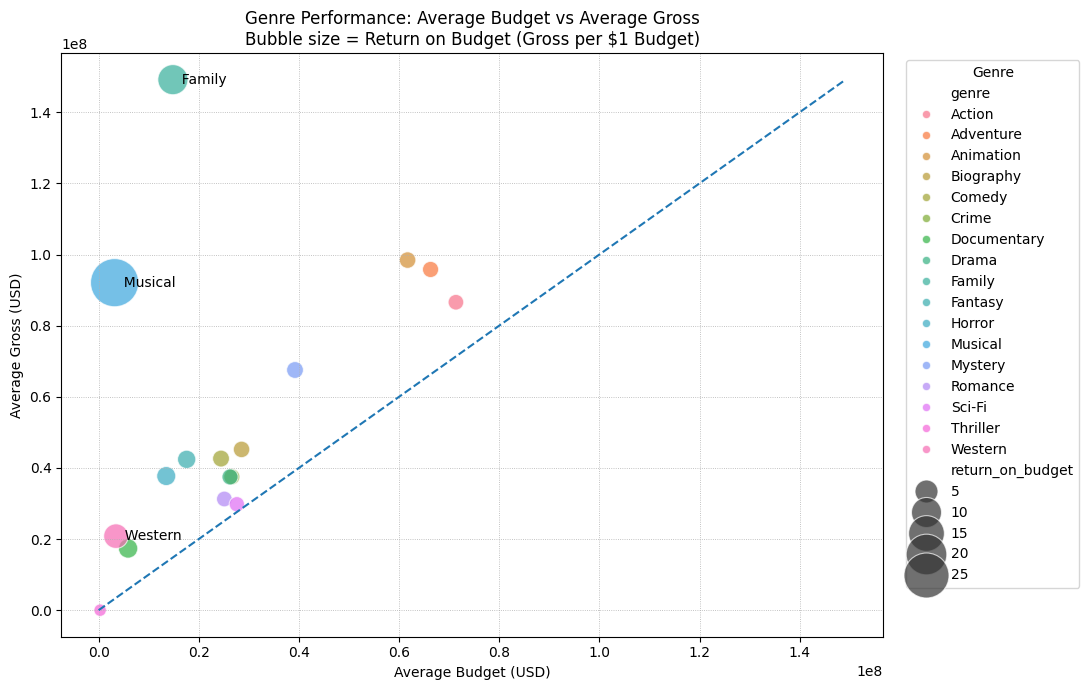

In [23]:
genre_perf = (
    movies.groupby('genre')
          .agg(avg_budget=('budget','mean'),
               avg_gross =('gross','mean'),
               avg_rating=('rating','mean'),
               n=('title','count'))
          .reset_index()
)
genre_perf['return_on_budget'] = genre_perf['avg_gross'] / genre_perf['avg_budget']

plt.figure(figsize=(11,7))
sns.scatterplot(
    data=genre_perf,
    x='avg_budget', y='avg_gross',
    size='return_on_budget', hue='genre',
    sizes=(80, 1200), alpha=0.7, edgecolor='white', linewidth=0.8
)

lim = max(genre_perf['avg_budget'].max(), genre_perf['avg_gross'].max())
plt.plot([0, lim], [0, lim], linestyle='--')
plt.title('Genre Performance: Average Budget vs Average Gross\nBubble size = Return on Budget (Gross per $1 Budget)')
plt.xlabel('Average Budget (USD)')
plt.ylabel('Average Gross (USD)')
plt.grid(True, linestyle=':', linewidth=0.6)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Genre')
plt.tight_layout()

top3 = genre_perf.nlargest(3, 'return_on_budget')
for _, r in top3.iterrows():
    plt.text(r['avg_budget'], r['avg_gross'], f"  {r['genre']}", va='center')

plt.show()


### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.